<a href="https://colab.research.google.com/github/shashankpulijala/DeepLearning/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

# Linear regression with pytorch

In [0]:
n = 100
x  = torch.ones(n, 2)

In [3]:
x[:,0].uniform_(-1.,1)


tensor([-0.9626, -0.1981, -0.0081,  0.1586,  0.0691,  0.5605, -0.1540, -0.5685,
         0.7025, -0.2408, -0.2704, -0.3073, -0.0494, -0.5087,  0.8037,  0.1411,
         0.7353,  0.9815, -0.9732,  0.5623,  0.9632, -0.7074,  0.9356, -0.3575,
        -0.8336, -0.4864,  0.8298,  0.3919, -0.2239,  0.9207, -0.7713,  0.8385,
        -0.8649,  0.2185,  0.7384,  0.3024, -0.0471, -0.6964, -0.1902, -0.4025,
         0.3054, -0.3490, -0.1558, -0.1043,  0.4248,  0.5174,  0.9971,  0.2689,
        -0.8761,  0.4416,  0.1628,  0.1309, -0.2231, -0.8317,  0.5635,  0.3597,
        -0.1760,  0.3250,  0.2433,  0.1685, -0.6605,  0.9539,  0.4121,  0.3479,
         0.5590,  0.5456,  0.6790,  0.6724, -0.2236,  0.2712, -0.7915, -0.7290,
         0.9910, -0.9418, -0.0350,  0.3201, -0.9798, -0.0512, -0.2600,  0.1380,
        -0.8676, -0.3444, -0.3175, -0.7317, -0.9141,  0.6648, -0.4368,  0.2222,
        -0.4031,  0.7173, -0.1503, -0.3438,  0.5510,  0.5444,  0.3584,  0.9535,
        -0.5947,  0.0318, -0.9672, -0.13

In [4]:
x[:5]

tensor([[-0.9626,  1.0000],
        [-0.1981,  1.0000],
        [-0.0081,  1.0000],
        [ 0.1586,  1.0000],
        [ 0.0691,  1.0000]])

In [0]:
a = tensor(3., 2)
y = x@a + torch.rand(n)

In [6]:
a.shape

torch.Size([2])

In [7]:
a = tensor(3.,2); a

tensor([3., 2.])

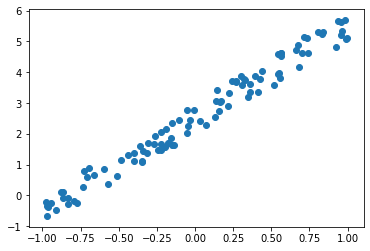

In [8]:
plt.scatter(x[:,0], y);

# Mininmizing the error


In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [10]:
a = tensor(-1.0, 1.0)
y_hat = x@a
print("Mean Squared Loss :", mse(y_hat, y))

Mean Squared Loss : tensor(8.1218)


In [0]:
a = tensor(-1.,1)

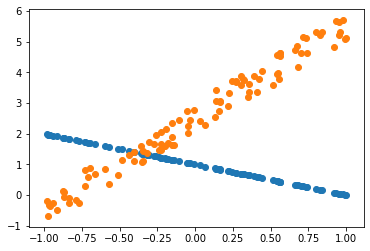

In [12]:
plt.scatter(x[:,0], y_hat)
plt.scatter(x[:,0], y)

In [13]:
a.shape

torch.Size([2])

In [14]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update() :
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%10 == 0 : print(loss)
  loss.backward()
  with torch.no_grad() :
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [17]:
lr = 1e-1
for t in range(100): update()

tensor(8.1218, grad_fn=<MseLossBackward>)
tensor(1.4689, grad_fn=<MseLossBackward>)
tensor(0.4297, grad_fn=<MseLossBackward>)
tensor(0.1715, grad_fn=<MseLossBackward>)
tensor(0.1056, grad_fn=<MseLossBackward>)
tensor(0.0887, grad_fn=<MseLossBackward>)
tensor(0.0844, grad_fn=<MseLossBackward>)
tensor(0.0833, grad_fn=<MseLossBackward>)
tensor(0.0830, grad_fn=<MseLossBackward>)
tensor(0.0829, grad_fn=<MseLossBackward>)


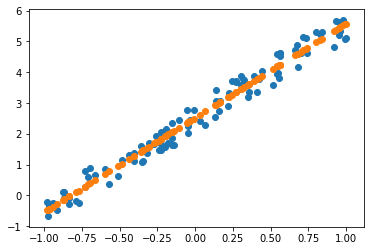

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [24]:
a = nn.Parameter(tensor(-1., 1))
fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()
def animate(i) :
  update()
  line.set_ydata(x@a)
  return line
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)